In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HSBC_ST138D-XLS-ENG.xlsx to HSBC_ST138D-XLS-ENG.xlsx


In [3]:
file_path = next(iter(uploaded))
xls = pd.ExcelFile(file_path)

In [4]:
print("Available sheets in the Excel file:", xls.sheet_names)

Available sheets in the Excel file: ['Data Dictionary', 'Synthetic Data']


In [5]:
df = xls.parse("Synthetic Data")

In [6]:
df.head()

,AGE,INCOME,TRB,DIG_ACTIVE,FX_TRANS,PAYME,CC,LN,MT,TD,SC,SP,BD,MPF
0,30-34,9012.126323,62051.474999,0,0,1,0,0,0,0,0,0,0,1
1,30-34,44108.030639,4.053788,1,0,0,1,0,0,0,0,0,0,0
2,25-29,45782.412638,291995.998395,1,0,0,0,0,0,0,0,0,0,0
3,30-34,26525.406385,81.503869,1,0,0,0,0,0,0,1,0,0,0
4,30-34,20671.511249,1447.011647,1,0,1,0,0,0,0,0,0,0,0


In [7]:
le = LabelEncoder()
df['AGE_encoded'] = le.fit_transform(df['AGE'])

In [8]:
features = ['AGE_encoded', 'INCOME', 'TRB', 'DIG_ACTIVE', 'FX_TRANS']
X =- df[features]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

In [11]:
X_scaled_df.head()

,AGE_encoded,INCOME,TRB,DIG_ACTIVE,FX_TRANS
0,-1.118073,0.858099,0.257181,2.121165,0.557884
1,-1.118073,-0.497366,0.415584,-0.471439,0.557884
2,0.106998,-0.562033,-0.329854,-0.471439,0.557884
3,-1.118073,0.181706,0.415386,-0.471439,0.557884
4,-1.118073,0.407794,0.411900,-0.471439,0.557884


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [14]:
print("Summary Statistics")
display(df.describe(include = 'all'))

Summary Statistics


,AGE,INCOME,TRB,DIG_ACTIVE,FX_TRANS,PAYME,CC,LN,MT,TD,SC,SP,BD,MPF,AGE_encoded
count,50000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,30-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.123016e+04,1.627904e+05,0.818160,0.237360,0.66570,0.48838,0.076440,0.077520,0.093200,0.096360,0.049880,0.071360,0.28964,1.087340
std,NaN,2.589240e+04,3.917090e+05,0.385716,0.425469,0.47175,0.49987,0.265703,0.267417,0.290715,0.295087,0.217699,0.257428,0.45360,0.816287
min,NaN,-1.966988e+04,0.000000e+00,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,NaN,1.855612e+04,4.681008e+03,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,NaN,2.710790e+04,3.790828e+04,1.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,NaN,3.986781e+04,1.703579e+05,1.000000,0.000000,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,2.000000


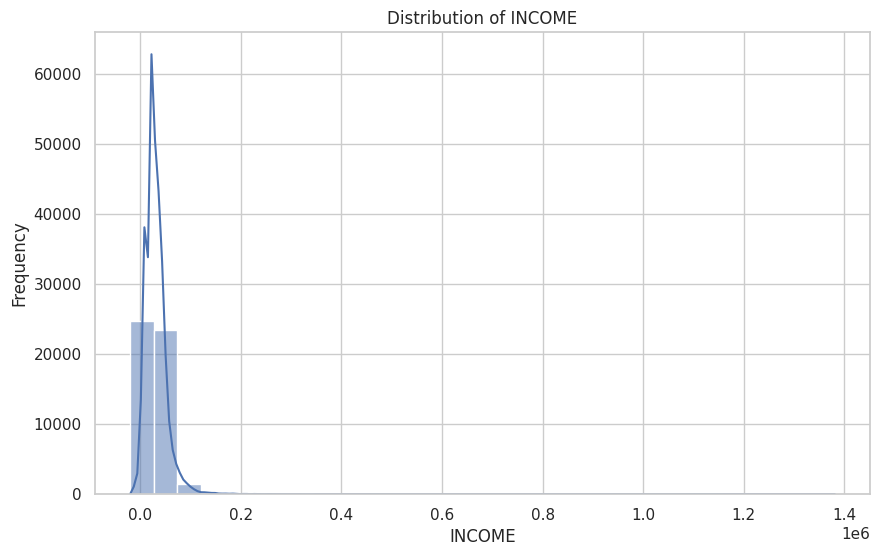

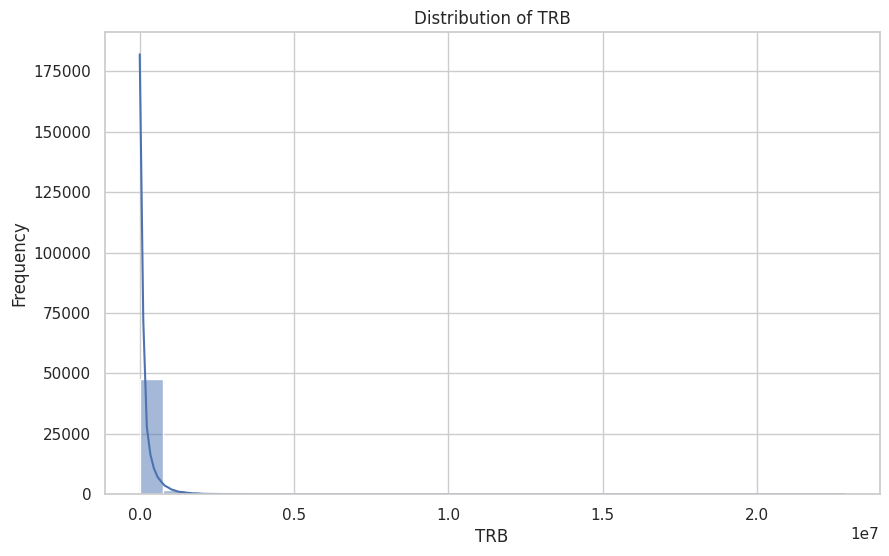

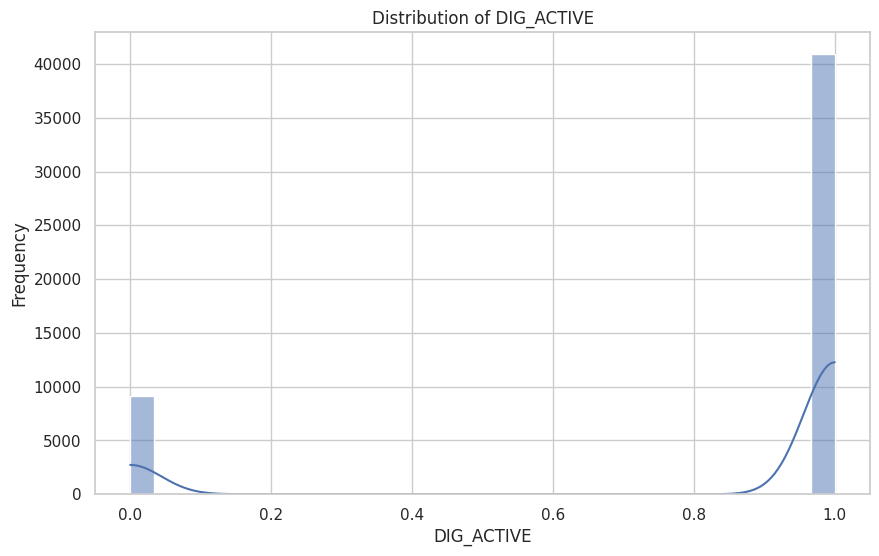

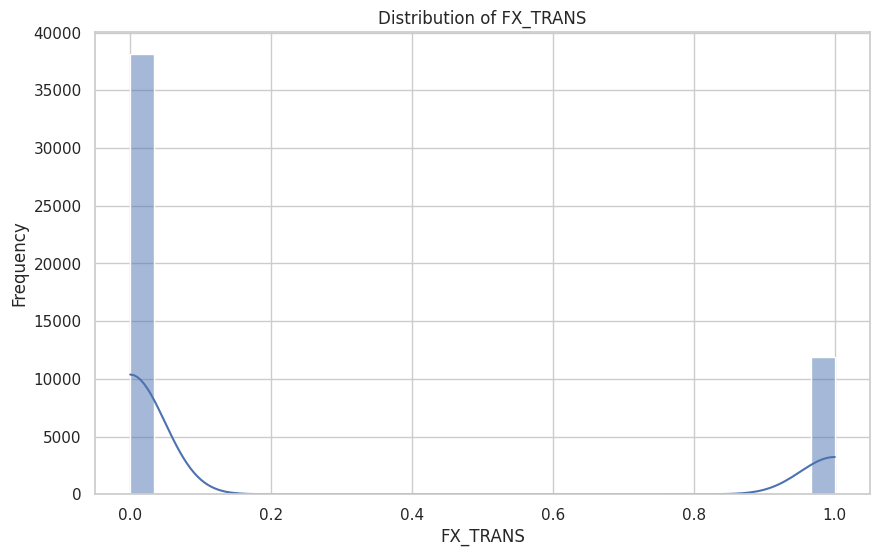

In [15]:
numerical_features = ['INCOME', 'TRB', 'DIG_ACTIVE', 'FX_TRANS']
for col in numerical_features:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [16]:
product_cols = ['PAYME', 'CC', 'LN', 'MT', 'TD', 'SC', 'SP', 'BD', 'MPF']
eda_features = numerical_features + product_cols

In [17]:
corr_matrix = df[eda_features].corr()

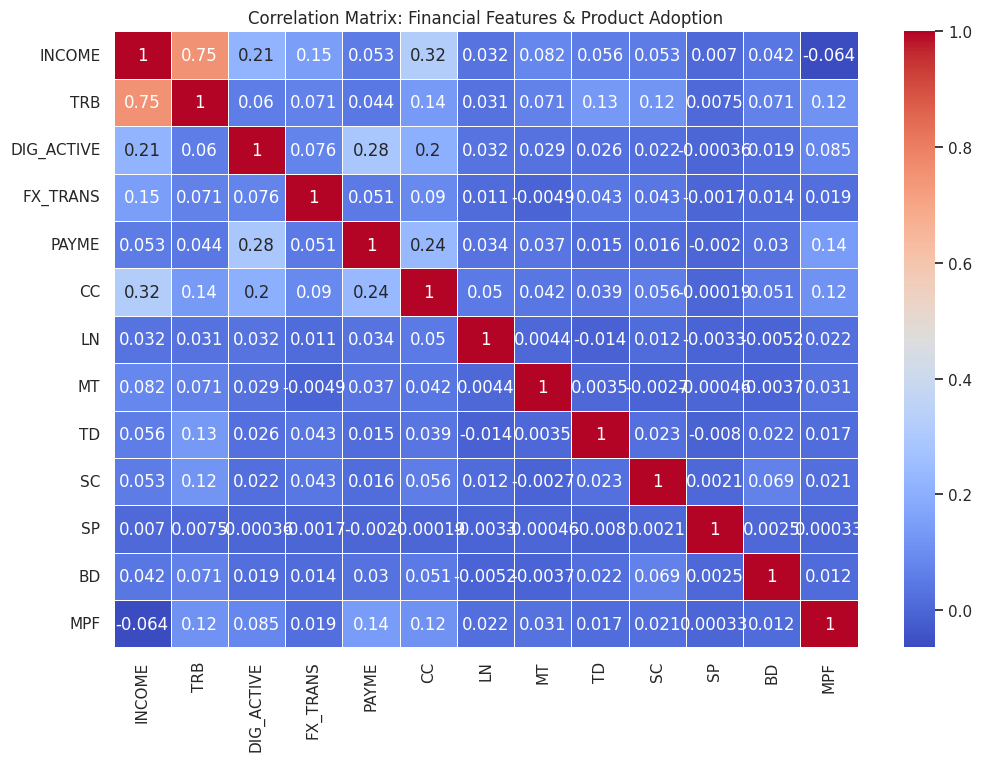

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Financial Features & Product Adoption')
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

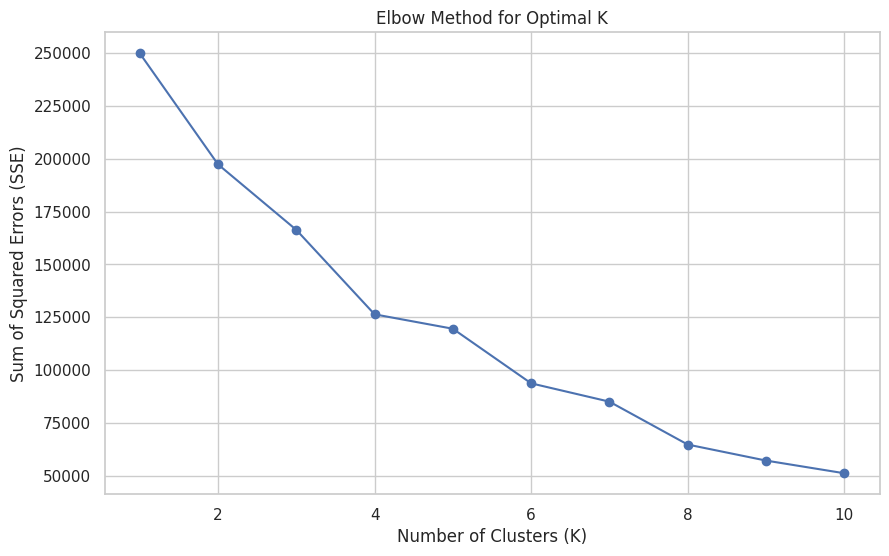

In [21]:
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [22]:
optimal_k=3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [23]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Centroids:")
display(centroids)

Centroids:


,AGE_encoded,INCOME,TRB,DIG_ACTIVE,FX_TRANS
0,0.730928,0.271628,0.252036,0.023805,0.557884
1,0.000470,-0.270943,-0.127518,-0.136769,-1.792487
2,-0.995756,-0.170748,-0.249496,0.068118,0.557884


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:,0]
df['PC2'] = components[:,1]

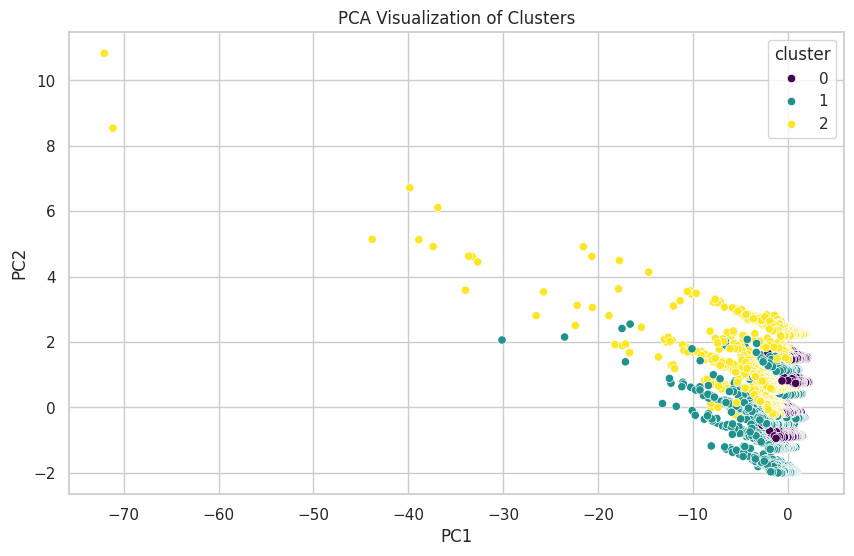

In [25]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df, palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
k_values=[2, 3, 5]
silhouette_scores = []
centroid_snapshots = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

In [28]:
X= StandardScaler()
scaled_df = X.fit_transform(df.iloc[:,1:6])
scaled_df

array([[-0.85809944, -0.25718066, -2.12116479, -0.55788409,  0.7086453 ],
       [ 0.49736585, -0.41558409,  0.47143909, -0.55788409, -1.41114321],
       [ 0.56203341,  0.32985422,  0.47143909, -0.55788409, -1.41114321],
       ...,
       [ 2.36488124,  1.02678875, -2.12116479, -0.55788409,  0.7086453 ],
       [ 2.31664335, -0.03066073,  0.47143909, -0.55788409, -1.41114321],
       [ 2.31235852,  1.3326194 ,  0.47143909, -0.55788409,  0.7086453 ]])

In [29]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
print(silhouette_score(scaled_df,labels))

0.43818538457488904


In [34]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
print(silhouette_score(scaled_df,labels))

0.4212998429738498


In [35]:
k_means = KMeans(n_clusters = 5,random_state=1) #optimal k=5
k_means.fit(scaled_df)
labels = k_means.labels_
print(silhouette_score(scaled_df,labels))

0.5282908846741512


In [36]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [31]:
cluster_summary = df.groupby('Cluster')[eda_features].mean()
print("Cluster Summary:")
display(cluster_summary)

Cluster Summary:


,INCOME,TRB,DIG_ACTIVE,FX_TRANS,PAYME,CC,LN,MT,TD,SC,SP,BD,MPF
Cluster,,,,,,,,,,,,,
0,26325.364609,67049.091652,1.000000,0.000000,0.718155,0.458812,0.070504,0.062928,0.079380,0.073670,0.049302,0.063380,0.272856
1,40141.676348,227143.493766,0.989466,1.000000,0.744589,0.602279,0.084945,0.077188,0.120475,0.122582,0.050373,0.080061,0.318809
2,40363.827273,298772.684324,0.992683,0.000308,0.727357,0.586491,0.090804,0.110675,0.103512,0.117375,0.050216,0.082948,0.345271
3,17176.555585,79051.160561,0.000000,0.160009,0.378530,0.270057,0.057275,0.058512,0.073591,0.080005,0.049961,0.060088,0.207494


In [32]:
print("Cluster Sizes:")
display(df['Cluster'].value_counts())

Cluster Sizes:


,count
Cluster,
0,17687
2,12984
1,10442
3,8887


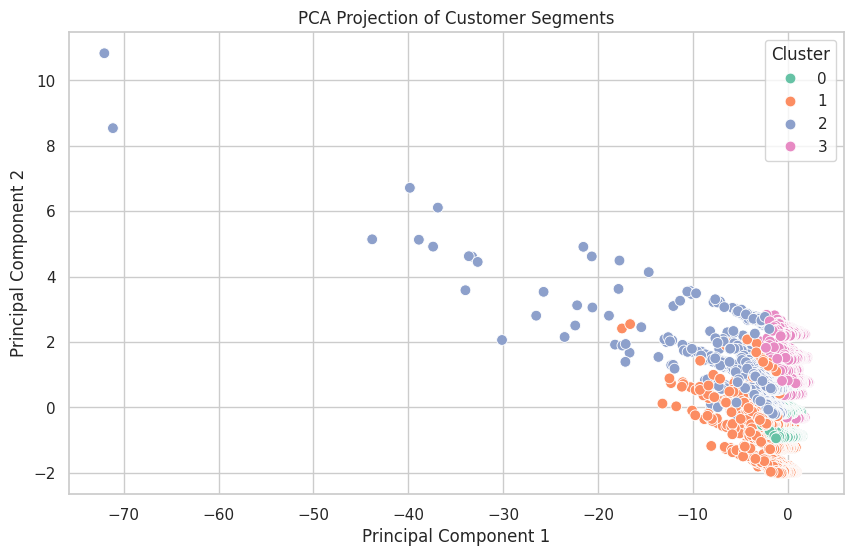

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('PCA Projection of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()